**Objective:**

The main objective of this project is to analyze, visualize, and predict stock prices using historical data and advanced modelling techniques to gain meaningful insights for investors and traders.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, plot_importance

In [ ]:
# File paths
file_info = "TCS_stock_info.csv"
file_history = "TCS_stock_history.csv"
file_action = "TCS_stock_action.csv"

**Preprocessing**

In [ ]:
# Load datasets
df_info = pd.read_csv(file_info)
df_history = pd.read_csv(file_history)
df_action = pd.read_csv(file_action)


In [ ]:
# Display first few rows of each dataset
print("TCS stock Info:\n", df_info.head(), "\n")
print("TCS stock History:\n", df_history.head(), "\n")
print("TCS stock Actions:\n", df_action.head(), "\n")

TCS stock Info:
                    zip                                             400001
0               sector                                         Technology
1    fullTimeEmployees                                             509058
2  longBusinessSummary  Tata Consultancy Services Limited provides inf...
3                 city                                             Mumbai
4                phone                                    91 22 6778 9999 

TCS stock History:
          Date       Open       High        Low      Close  Volume  Dividends  \
0  2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1  2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2  2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3  2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4  2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  


* Stock History and actions are sorted by "Date" in ascending order.
* Stock info isn't sorted becayse is contains general comapny details.



In [ ]:
# Convert 'Date' columns to datetime format
df_history["Date"] =pd.to_datetime(df_history["Date"])
df_action["Date"] =pd.to_datetime(df_action["Date"])

In [ ]:
# Handling missing values
df_history.ffill(inplace=True)
df_action.fillna(0, inplace=True)

In [ ]:
# Remove duplicates if any
df_history.drop_duplicates(inplace=True)
df_action.drop_duplicates(inplace=True)

In [ ]:
# Sort datasets
df_history.sort_values(by="Date", ascending=True, inplace=True)
df_action.sort_values(by="Date", ascending=True, inplace=True)

In [ ]:
# Reset Index after sorting
df_history.reset_index(drop=True, inplace=True)
df_action.reset_index(drop=True, inplace=True)

In [ ]:
# Display the preprocessed dataset
print("Preprocessed TCS stock History:\n", df_history.head(), "\n")
print("Preprocessed TCS stock Actions:\n", df_action.head(), "\n")


Preprocessed TCS stock History:
         Date       Open       High        Low      Close  Volume  Dividends  \
0 2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1 2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2 2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3 2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4 2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0   

Preprocessed TCS stock Actions:
         Date  Dividends  Stock Splits
0 2004-10-28     0.3750           0.0
1 2005-02-03     0.4375           0.0
2 2005-07-06     0.6250           0.0
3 2005-08-18     0.3750           0.0
4 2005-10-18     0.3750           0.0 



**Exploratory Data Analysis**

In [ ]:
# Basic info about datasets
print("TCS stock Info summary:\n", df_info.info(), "\n")
print("TCS stock History summary:\n:", df_history.info(), "\n")
print("TCS stock Actions summary:\n", df_action.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   400001  108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
TCS stock Info summary:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB
TCS

In [ ]:
# Descriptive statistics
print("TCS stock History statistics:\n", df_history.describe(), "\n")
print("TCS stock Actions statistics:\n", df_action.describe(), "\n")


TCS stock History statistics:
                                 Date         Open         High          Low  \
count                           4463  4463.000000  4463.000000  4463.000000   
mean   2012-08-23 19:22:31.109119488   866.936239   876.675013   856.653850   
min              2002-08-12 00:00:00    24.146938    27.102587    24.146938   
25%              2008-02-14 12:00:00   188.951782   191.571816   185.979417   
50%              2012-09-04 00:00:00   530.907530   534.751639   525.616849   
75%              2017-03-22 12:00:00  1156.462421  1165.815854  1143.622800   
max              2021-09-30 00:00:00  3930.000000  3981.750000  3892.100098   
std                              NaN   829.905368   838.267104   821.233477   

             Close        Volume    Dividends  Stock Splits  
count  4463.000000  4.463000e+03  4463.000000   4463.000000  
mean    866.537398  3.537876e+06     0.071533      0.001344  
min      26.377609  0.000000e+00     0.000000      0.000000  
25%     1

In [ ]:
# Missing values check
print("Missing vales in stock History:\n", df_history.isnull().sum(), "\n")
print("Missing vales in stock Actions:\n", df_action.isnull().sum(), "\n")

Missing vales in stock History:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

Missing vales in stock Actions:
 Date            0
Dividends       0
Stock Splits    0
dtype: int64 



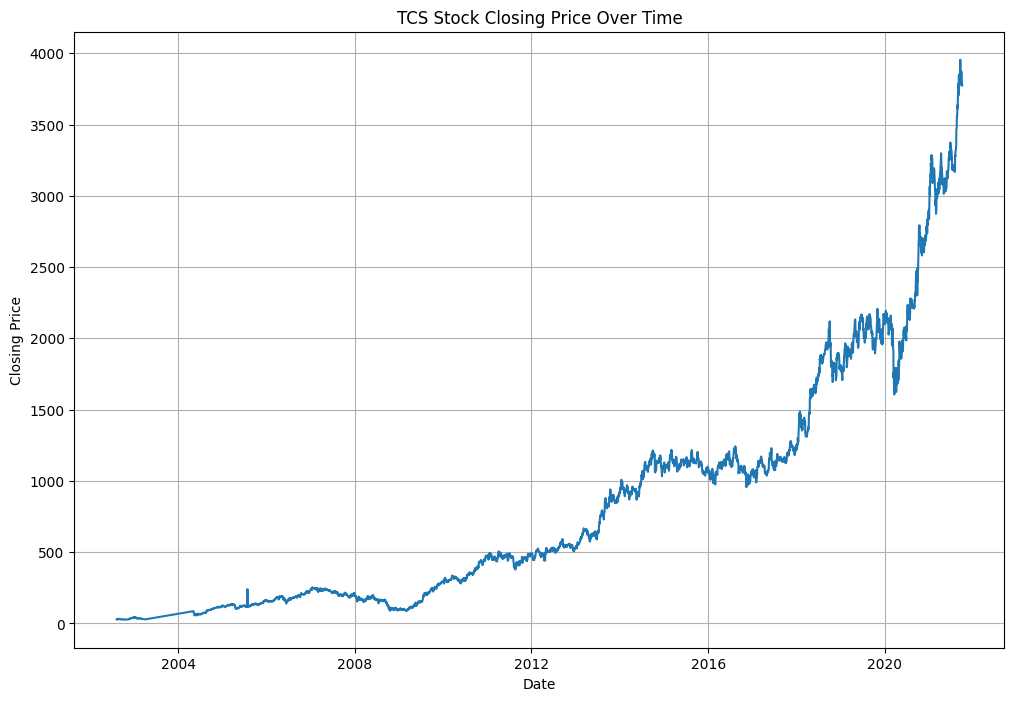

In [ ]:
# Lineplot - Tracks closing price over time
plt.figure(figsize=(12, 8))
sns.lineplot(x="Date", y="Close", data=df_history)
plt.title("TCS Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid()
plt.show()

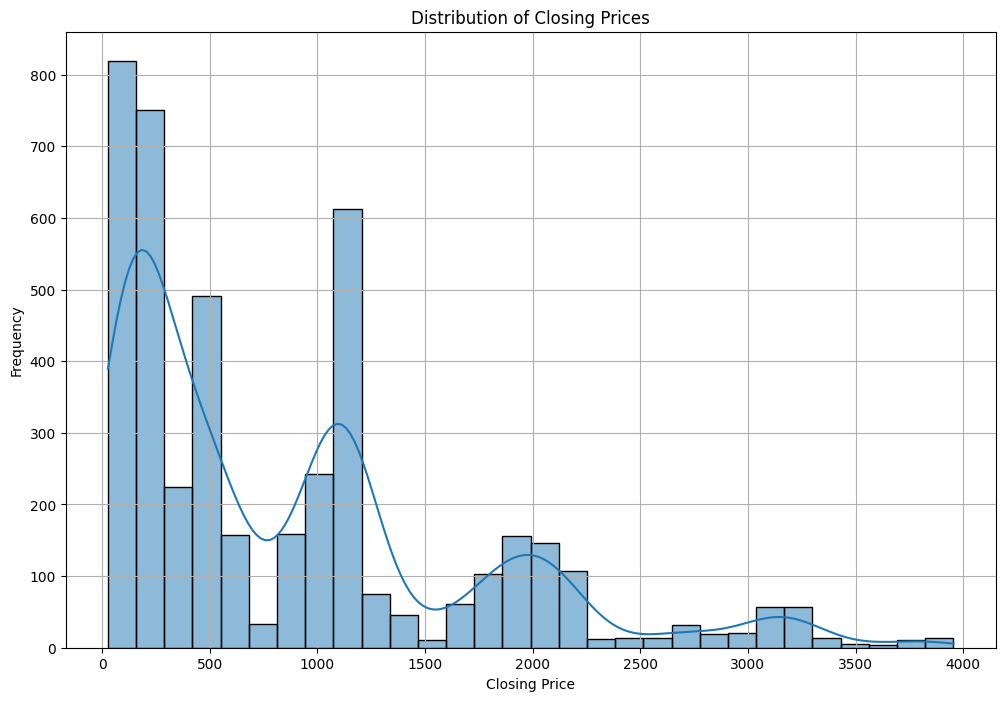

In [ ]:
# Histogram - Distribution of closing prices
plt.figure(figsize=(12, 8))
sns.histplot(df_history["Close"], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.grid()
plt.show()

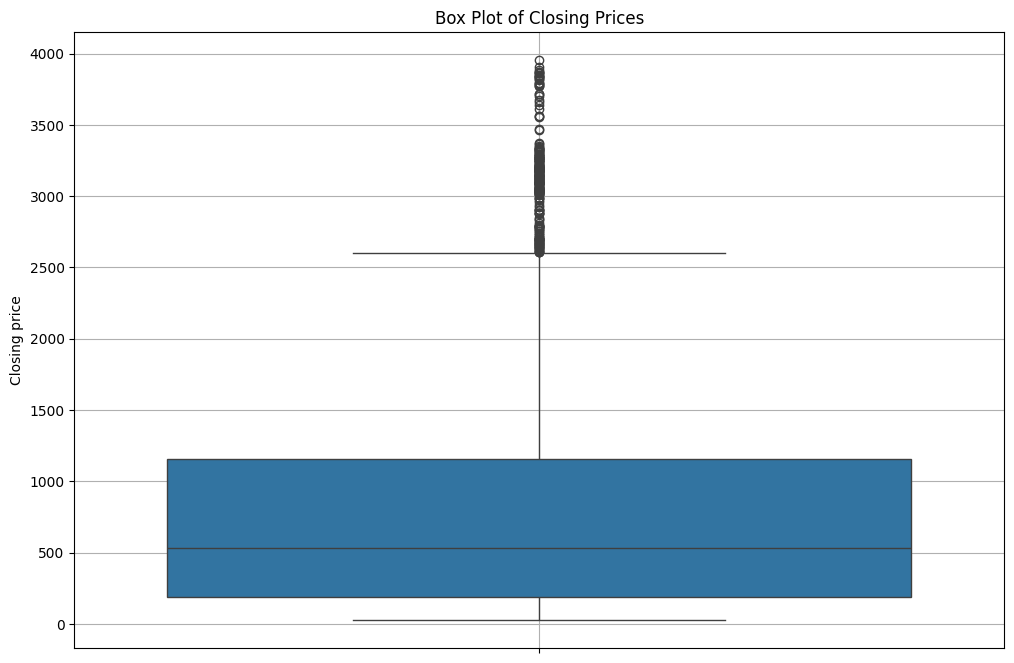

In [ ]:
# Boxplot - Highlights outliers in closing prices
plt.figure(figsize=(12, 8))
sns.boxplot(y=df_history["Close"])
plt.title("Box Plot of Closing Prices")
plt.ylabel("Closing price")
plt.grid()
plt.show()

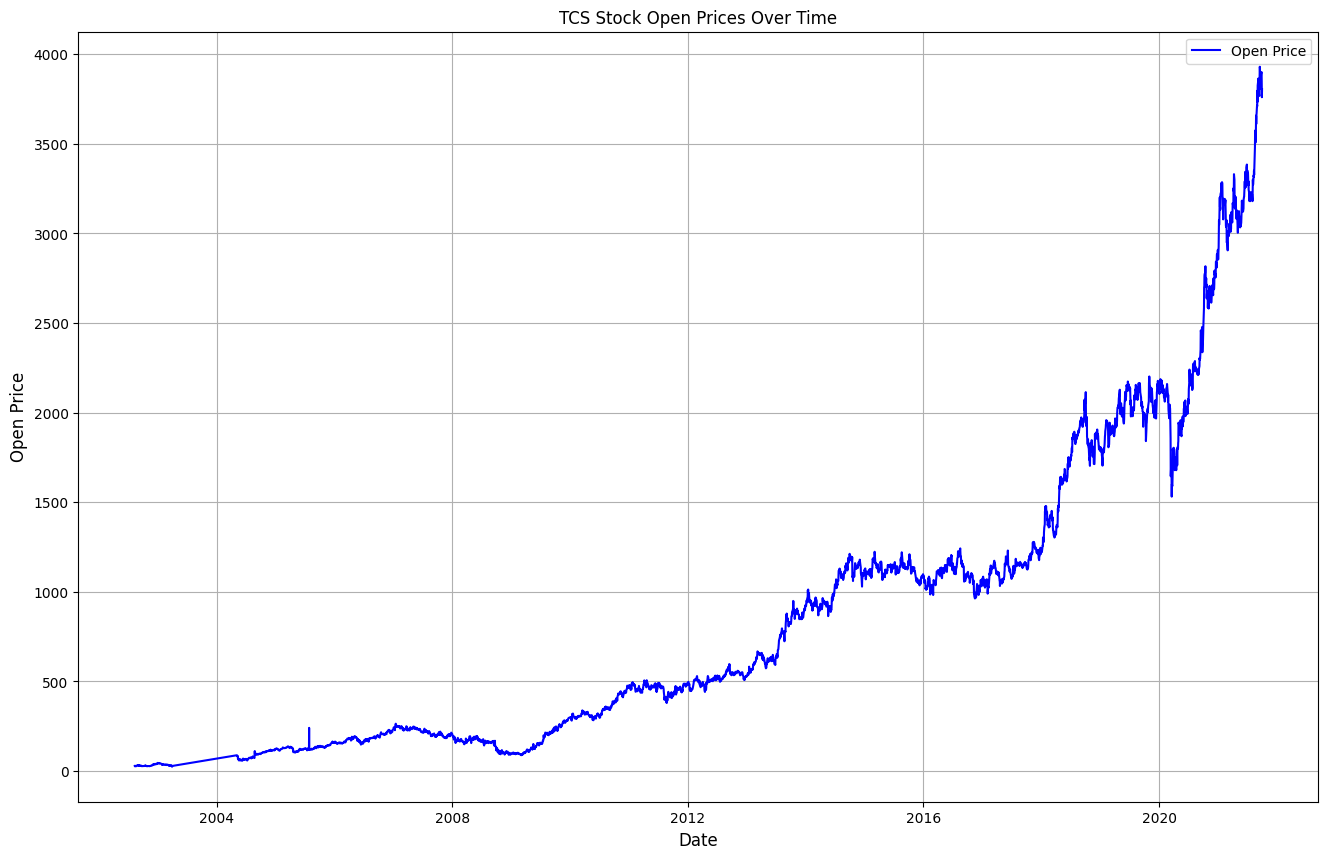

In [ ]:
# Plot open prices over time
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Open"], label="Open Price", color="blue")
plt.title("TCS Stock Open Prices Over Time")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Open Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

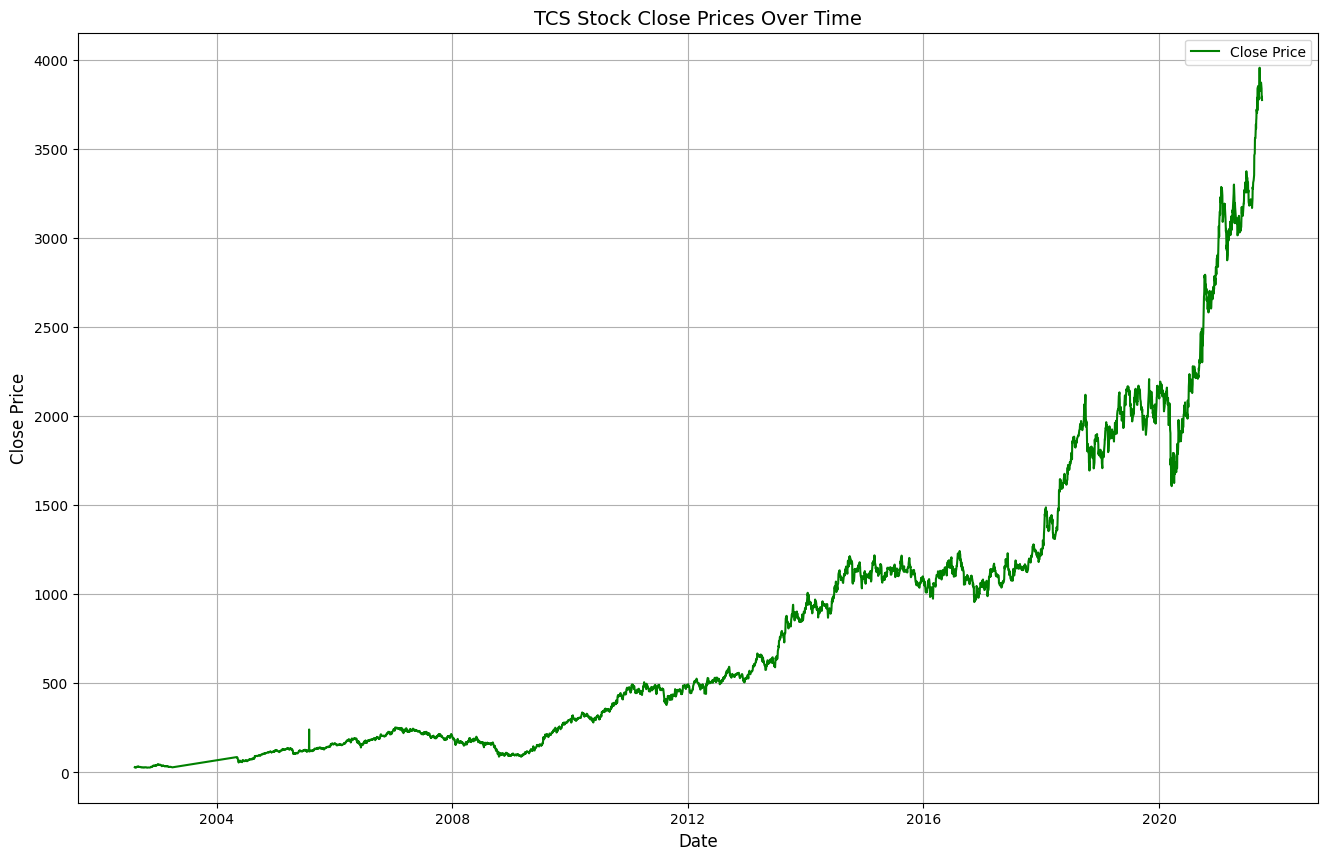

In [ ]:
# Plot Close prices over time
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Close"], label="Close Price", color="green")
plt.title("TCS Stock Close Prices Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

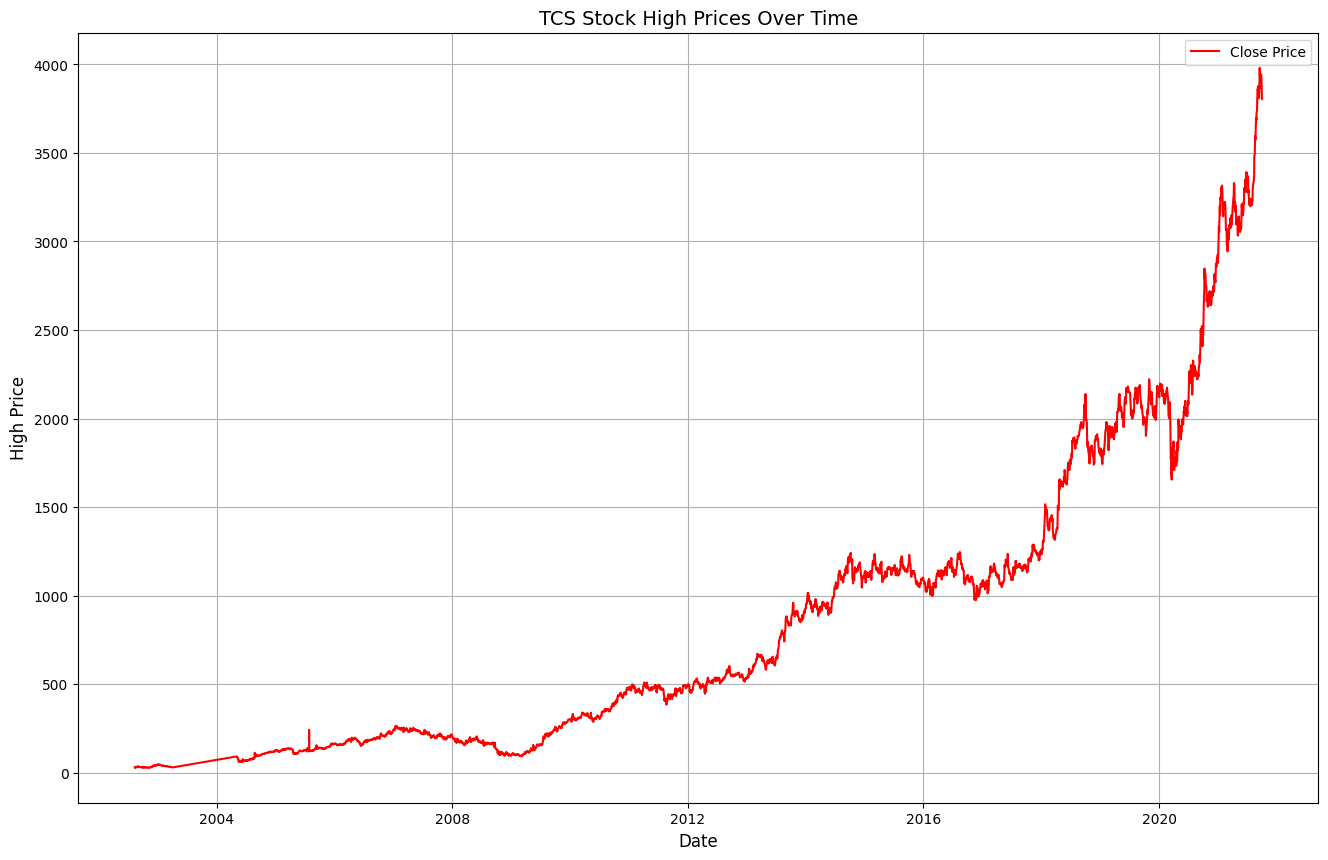

In [ ]:
# Plot High prices over time
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["High"], label="Close Price", color="red")
plt.title("TCS Stock High Prices Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("High Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

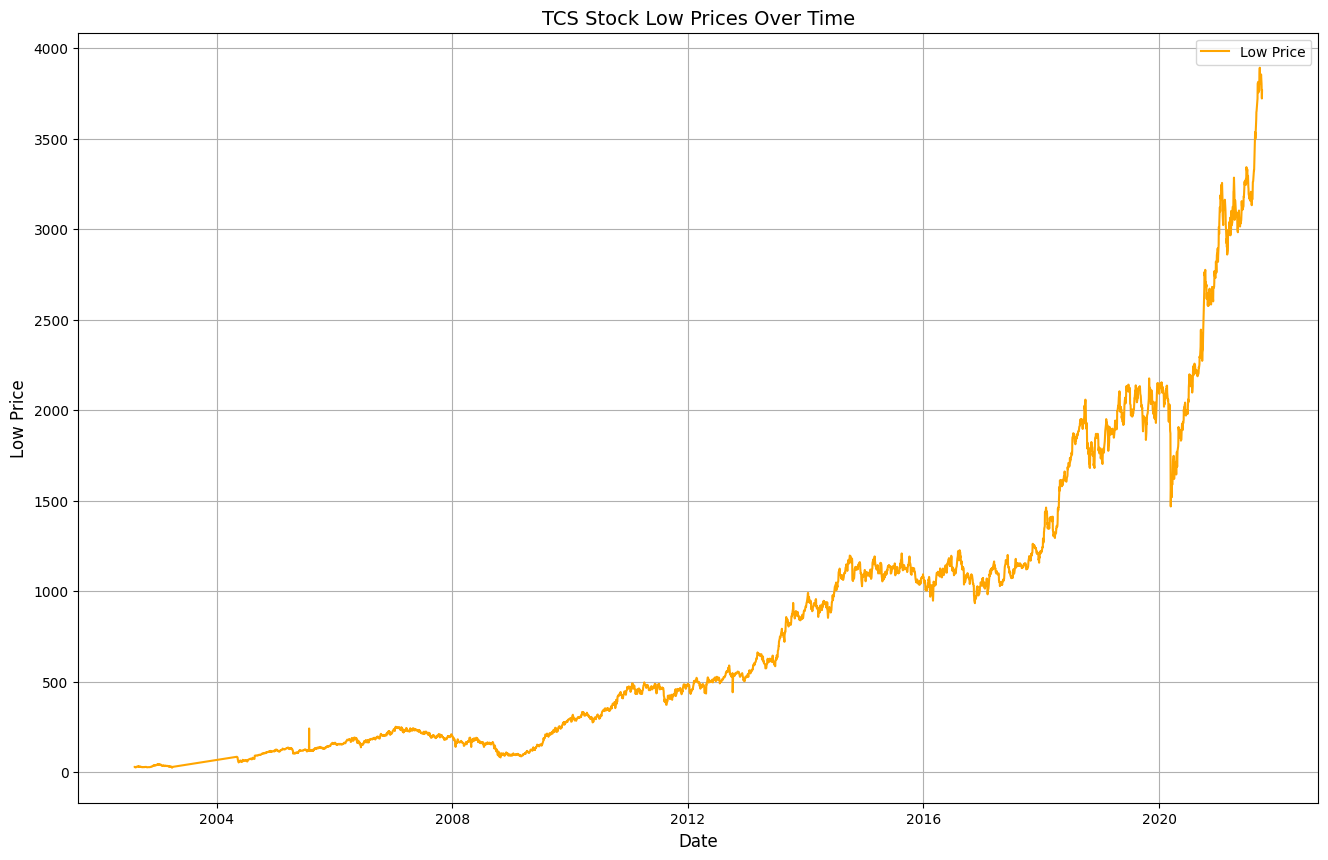

In [ ]:
# Plot Low prices over time
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Low"], label="Low Price", color="orange")
plt.title("TCS Stock Low Prices Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Low Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

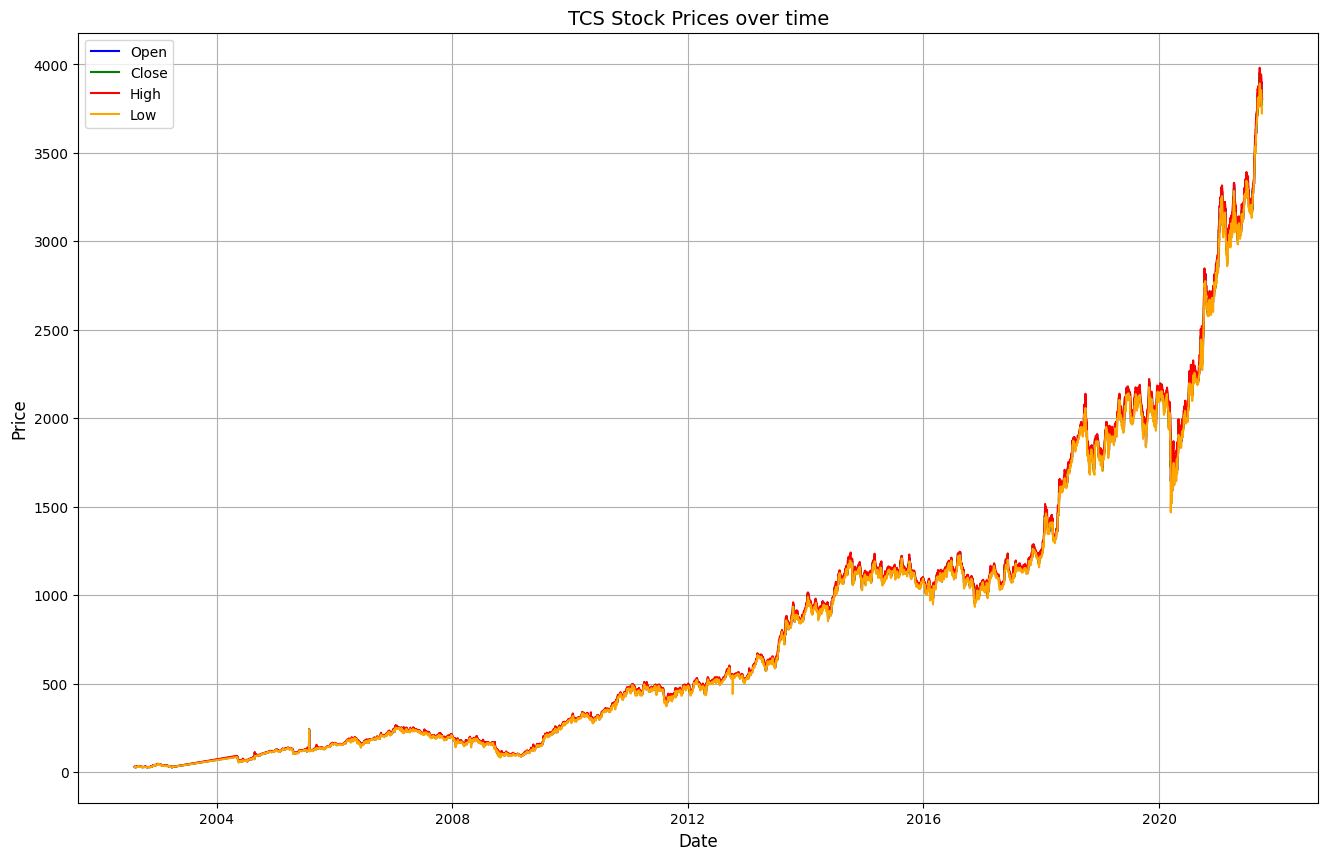

In [ ]:
# Plot Open, Close, High, and Low prices overtime
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Open"], label="Open", color="blue")
sns.lineplot(x=df_history["Date"], y=df_history["Close"], label="Close", color="green")
sns.lineplot(x=df_history["Date"], y=df_history["High"], label="High", color="red")
sns.lineplot(x=df_history["Date"], y=df_history["Low"], label="Low", color="orange")

# Formatting the plot
plt.title("TCS Stock Prices over time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid()
plt.show()

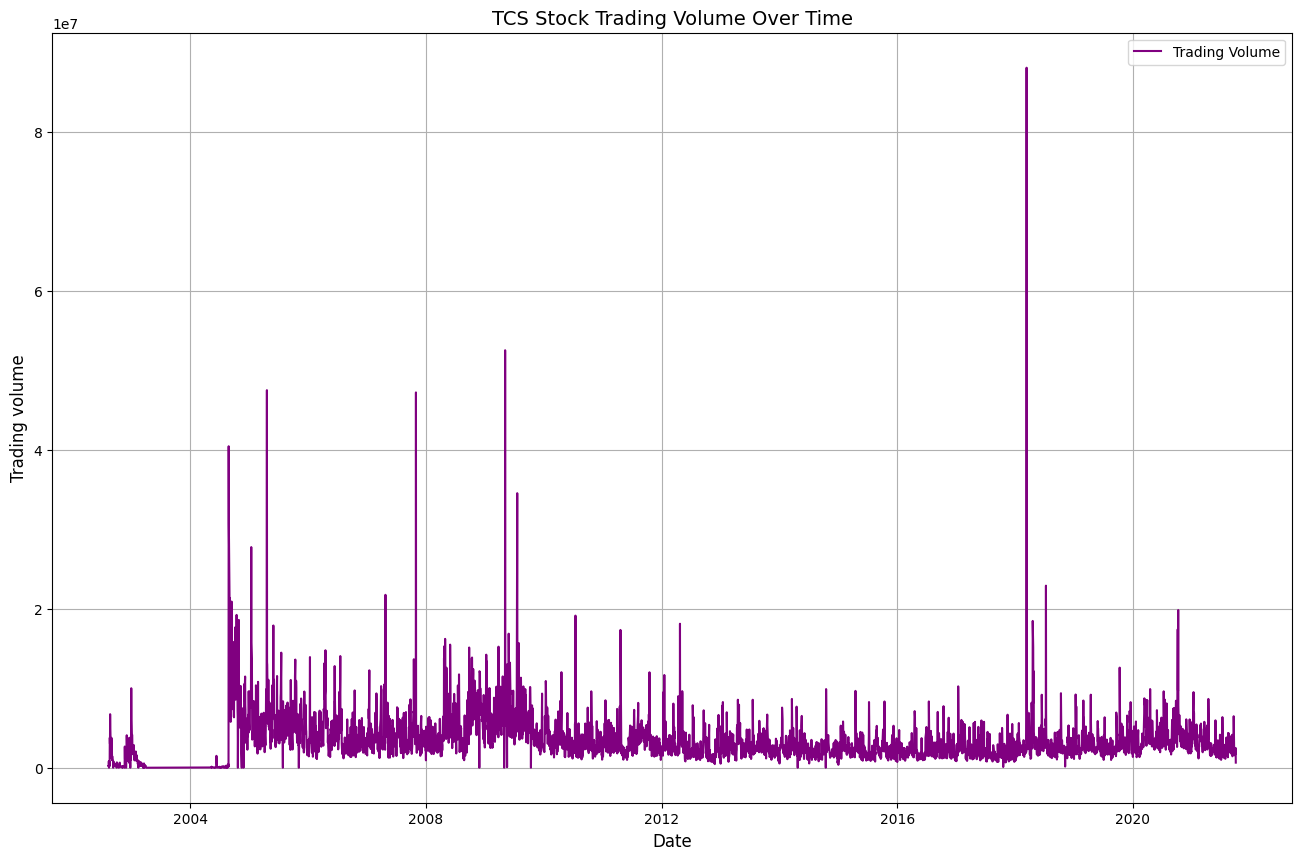

In [ ]:
# Plotting Trading volume over time
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Volume"], color="purple", label="Trading Volume")
plt.title("TCS Stock Trading Volume Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading volume", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Calculating moving averages
df_history["MA_50"] = df_history["Close"].rolling(window=50).mean()
df_history["MA_200"] = df_history["Close"].rolling(window=200).mean()

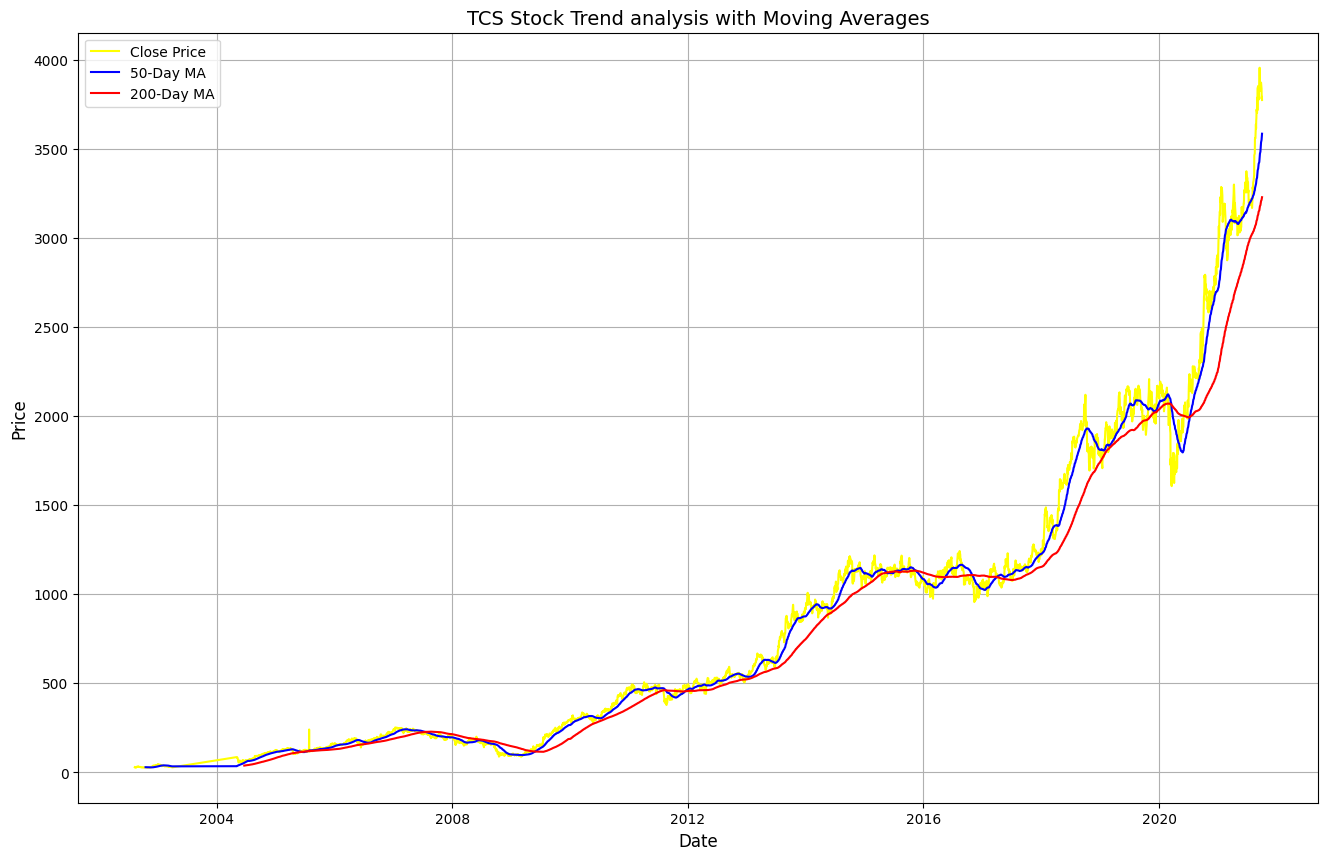

In [ ]:
# Plot with mmoving averages
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Close"], label="Close Price", color="yellow")
sns.lineplot(x=df_history["Date"], y=df_history["MA_50"], label="50-Day MA", color="blue")
sns.lineplot(x=df_history["Date"], y=df_history["MA_200"], label="200-Day MA", color="red")
plt.title("TCS Stock Trend analysis with Moving Averages", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

* Short-Term MA (50-Day) reacts quickly to price changes.
* Long-Term MA (200-Day) shows overall trend direction.

In [ ]:
# Different moving average periods
ma_periods = [20, 50, 100, 200]

In [ ]:
# Calculate moving averages
for period in ma_periods:
  df_history[f"MA_{period}"] = df_history["Close"].rolling(window=period).mean()

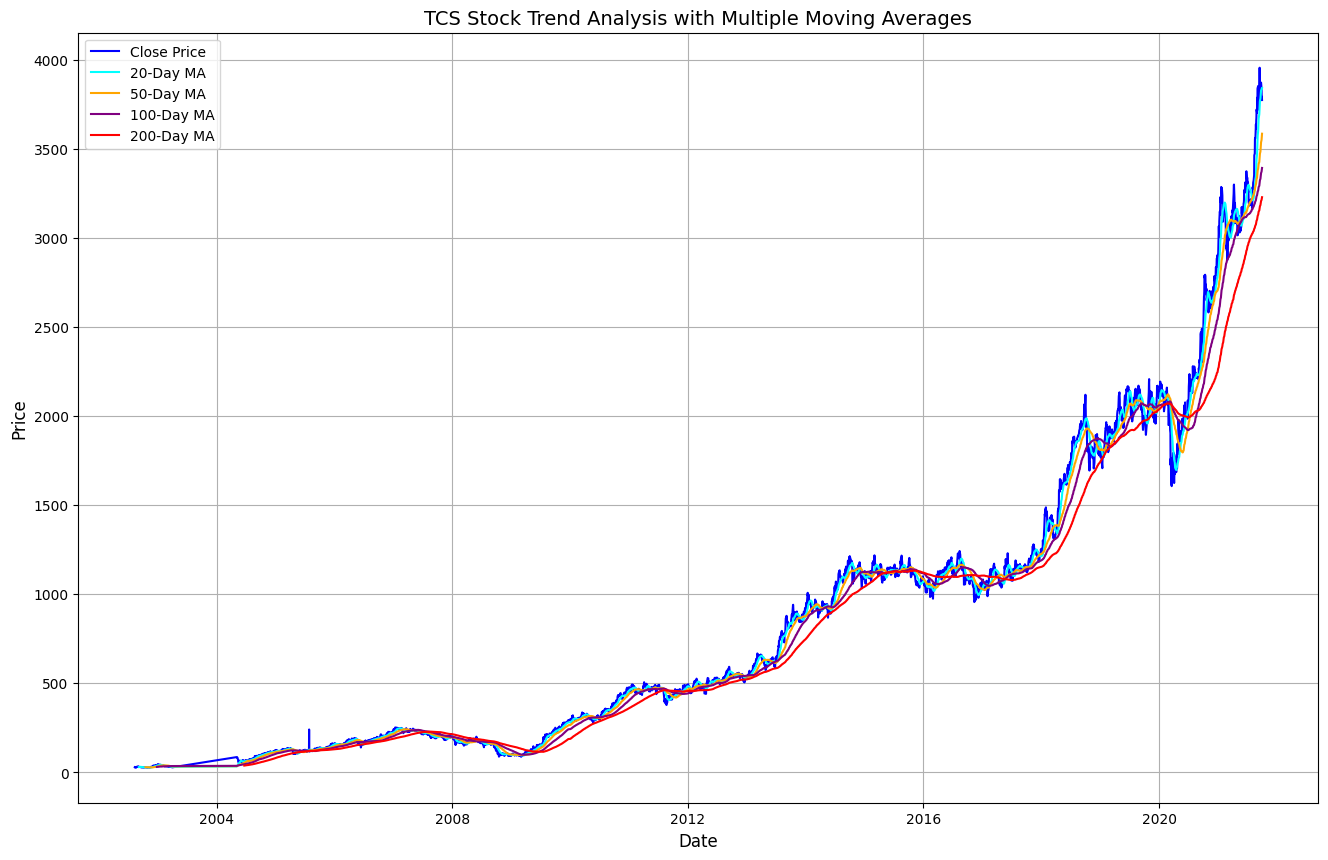

In [ ]:
# Plot closing prices with multiple moving averages
plt.figure(figsize=(16, 10))
sns.lineplot(x=df_history["Date"], y=df_history["Close"], label="Close Price", color="blue")
sns.lineplot(x=df_history["Date"], y=df_history["MA_20"], label="20-Day MA", color="cyan")
sns.lineplot(x=df_history["Date"], y=df_history["MA_50"], label="50-Day MA", color="orange")
sns.lineplot(x=df_history["Date"], y=df_history["MA_100"], label="100-Day MA", color="purple")
sns.lineplot(x=df_history["Date"], y=df_history["MA_200"], label="200-Day MA", color="red")
plt.title("TCS Stock Trend Analysis with Multiple Moving Averages", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

* This computes each MA dynamically and adds it to the dataset.  
* 20-Day MA is a short-term trend that is fast moving.
* 50-Day MA is a mid-term trend which is widely used in trading.
* 100-Day MA is a long-term trend indicator.
* 200-Day MA is a major trend direction investors use for market outlook.

**Feature Engineering**:
 Feature engineering is crucial for extracting meaningful insights from raw stock data.

In [ ]:
# Moving averages (Trend indicators)
df_history["MA_10"] = df_history["Close"].rolling(window=10).mean()
df_history["MA_50"] = df_history["Close"].rolling(window=50).mean()
df_history["MA_200"] = df_history["Close"].rolling(window=200).mean()

In [ ]:
# Price change
df_history["Daily_Return"] = df_history["Close"].pct_change() * 100

In [ ]:
# Volatility (Risk indicator) - Rolling standard deviation of returns
df_history["Volatility_10"] = df_history["Daily_Return"].rolling(window=10).std()
df_history["Volatility_50"] = df_history["Daily_Return"].rolling(window=50).std()

* Moving averages identify the trend direction.
* Daily returns measure stock price percentage change.
* Volatility measure risk based on standard deviation.

In [ ]:
# Relative strength index (RSI)
def compute_rsi(data, window=14):
  delta = data.diff()
  gain = np.where(delta > 0, delta, 0)
  loss = np.where(delta < 0, -delta, 0)

  avg_gain = pd.Series(gain).rolling(window=window).mean()
  avg_loss = pd.Series(loss).rolling(window=window).mean()

  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))
  return rsi

df_history["RSI_14"] = compute_rsi(df_history["Close"])


In [ ]:
# Moving average convergence divergence (MACD)
short_ema = df_history["Close"].ewm(span=12, adjust=False).mean()  # 12-day EMA
long_ema = df_history["Close"].ewm(span=26, adjust=False).mean()   # 26-day EMA
df_history["MACD"] =short_ema - long_ema
df_history["MACD_Signal"] = df_history["MACD"].ewm(span=9, adjust=False).mean()

In [ ]:
# Bollinger Bands (Volatility Indicator)
df_history["BB_Mid"] = df_history["Close"].rolling(window=20).mean()   # Middle band
df_history["BB_Upper"] = df_history["BB_Mid"] + (df_history["Close"].rolling(window=20).std() * 2)
df_history["BB_Lower"] = df_history["BB_Mid"] - (df_history["Close"].rolling(window=20).std() * 2)

In [ ]:
# Drop rows with NaN values ( caused by rolling calculations)
df_history.dropna(inplace=True)

In [ ]:
# Display the enhanced dataset with new features
print(df_history.head())

          Date       Open       High        Low      Close  Volume  Dividends  \
199 2004-06-21  66.919920  68.407029  64.540547  65.451401   49328        0.0   
200 2004-06-22  65.432855  65.618744  63.573967  63.927155   20064        0.0   
201 2004-06-23  64.596334  65.061056  61.584935  62.681683   22912        0.0   
202 2004-06-24  63.192893  64.317518  61.919554  63.722672   21592        0.0   
203 2004-06-25  63.202185  65.061073  63.202185  63.722672   60280        0.0   

     Stock Splits      MA_50     MA_200  ...      MA_10  Daily_Return  \
199           0.0  53.539858  38.361673  ...  63.981964     -1.067759   
200           0.0  54.208315  38.533714  ...  64.613990     -2.328821   
201           0.0  54.837176  38.701525  ...  64.939295     -1.948267   
202           0.0  55.496152  38.884579  ...  64.824975      1.660755   
203           0.0  56.147134  39.067632  ...  64.236637      0.000000   

     Volatility_10  Volatility_50     RSI_14      MACD  MACD_Signal  \
199

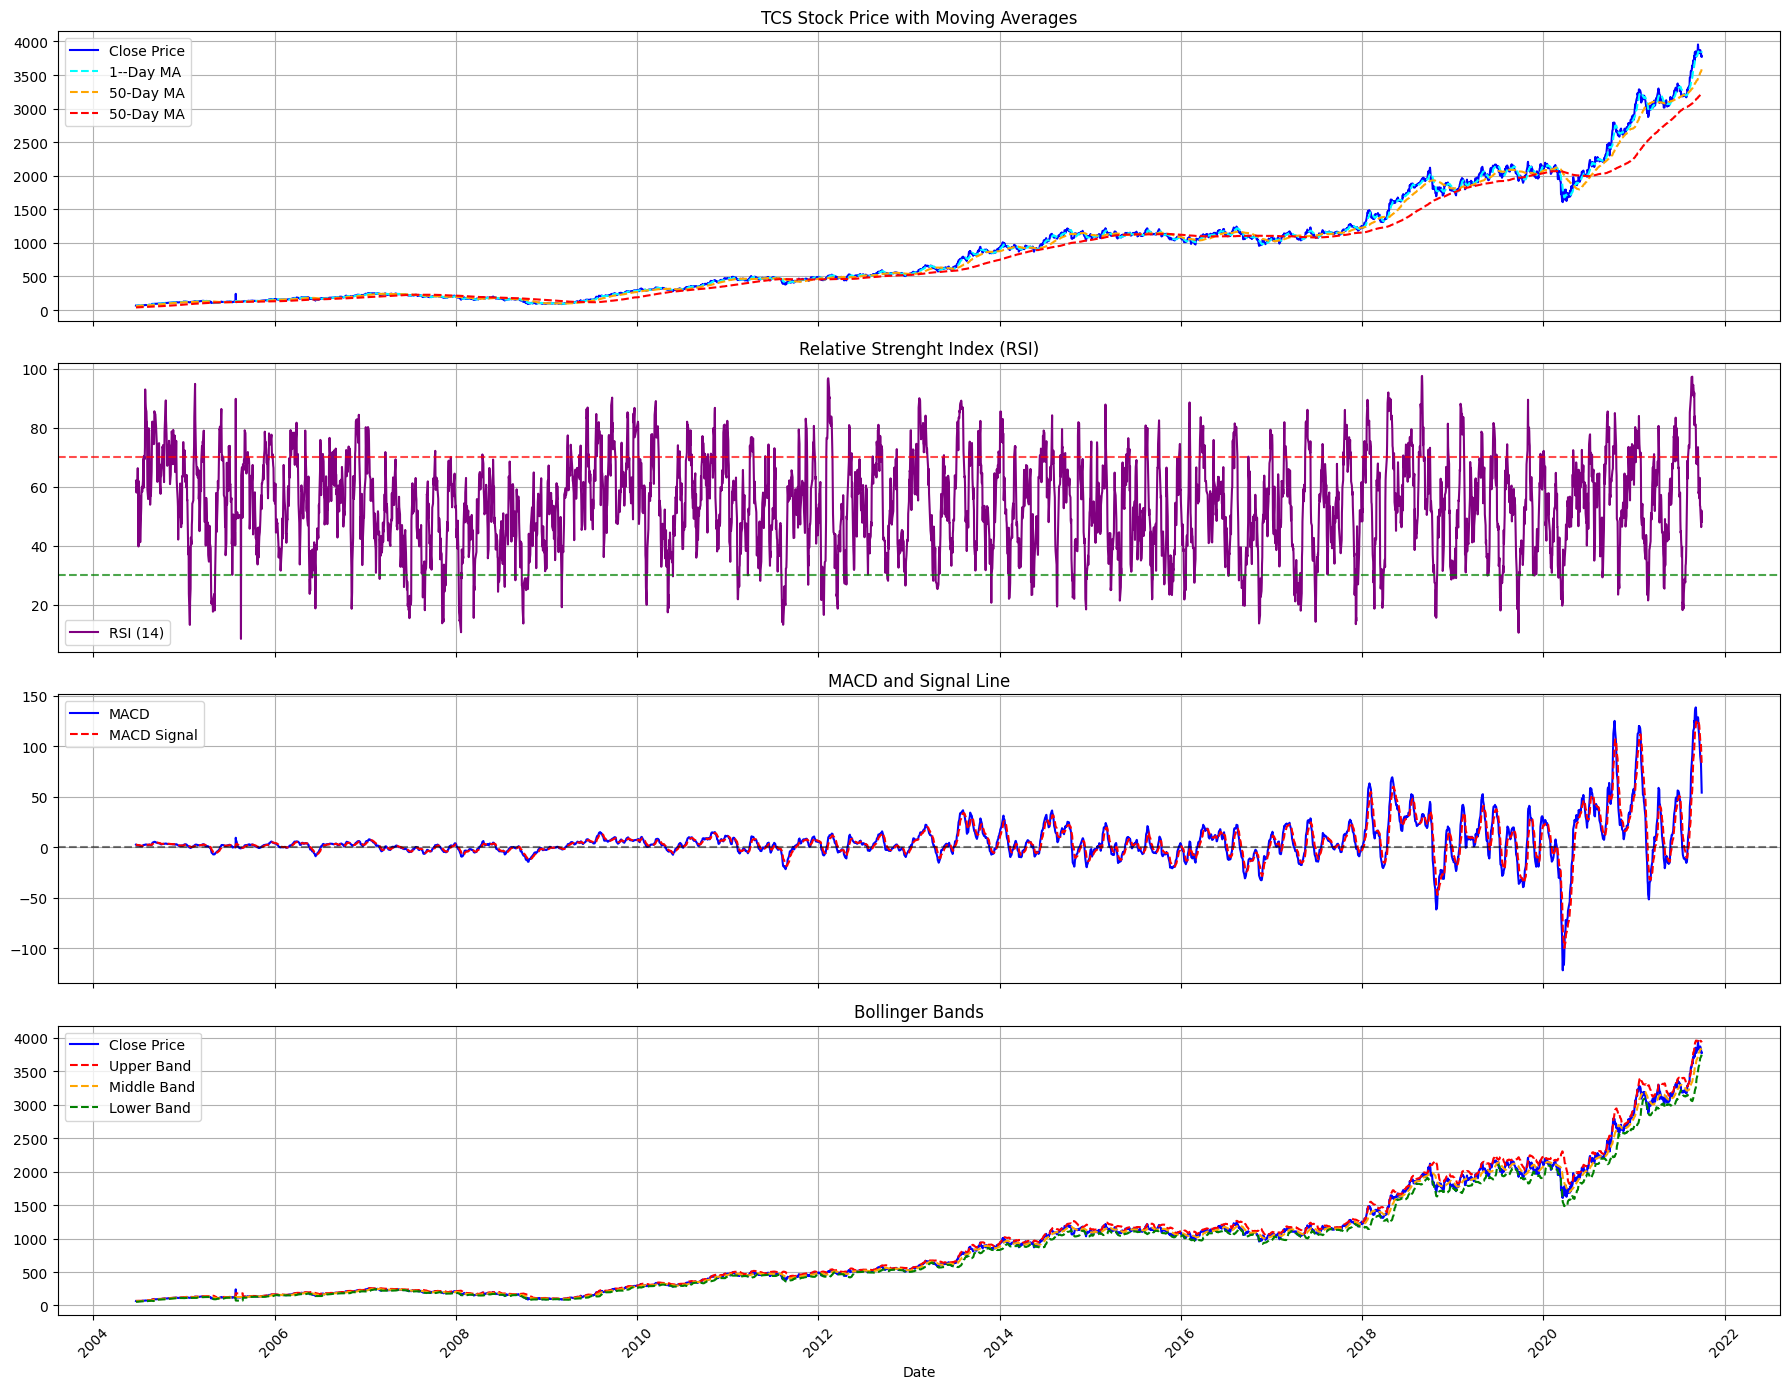

In [ ]:
# Calculate subplots for visualization
fig, axes = plt.subplots(4, 1, figsize=(18, 14), sharex=True)

# Plot closing price with moving averages
axes[0].plot(df_history["Date"], df_history["Close"], label="Close Price", color="blue")
axes[0].plot(df_history["Date"], df_history["MA_10"], label="1--Day MA", color="cyan", linestyle="dashed")
axes[0].plot(df_history["Date"], df_history["MA_50"], label="50-Day MA", color="orange", linestyle="dashed")
axes[0].plot(df_history["Date"], df_history["MA_200"], label="50-Day MA", color="red", linestyle="dashed")
axes[0].set_title("TCS Stock Price with Moving Averages")
axes[0].legend()
axes[0].grid()

#Plot RSI
axes[1].plot(df_history["Date"], df_history["RSI_14"], label="RSI (14)", color="purple")
axes[1].axhline(70, linestyle="--", color="red", alpha=0.7)   # Overbought line
axes[1].axhline(30, linestyle="--", color="green", alpha=0.7) # Oversold line
axes[1].set_title("Relative Strenght Index (RSI)")
axes[1].legend()
axes[1].grid()

# Plot MACD
axes[2].plot(df_history["Date"], df_history["MACD"], label="MACD", color="blue")
axes[2].plot(df_history["Date"], df_history["MACD_Signal"], label="MACD Signal", color="red", linestyle="dashed")
axes[2].axhline(0, linestyle="--", color="black", alpha=0.5)
axes[2].set_title("MACD and Signal Line")
axes[2].legend()
axes[2].grid()

# Plot Bollinger Bands
axes[3].plot(df_history["Date"], df_history["Close"], label="Close Price", color="blue")
axes[3].plot(df_history["Date"], df_history["BB_Upper"], label="Upper Band", color="red", linestyle="dashed")
axes[3].plot(df_history["Date"], df_history["BB_Mid"], label="Middle Band", color="orange", linestyle="dashed")
axes[3].plot(df_history["Date"], df_history["BB_Lower"], label="Lower Band", color="green", linestyle="dashed")
axes[3].set_title("Bollinger Bands")
axes[3].legend()
axes[3].grid()

# Show the plots
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Closing Price with Moving Averages**
   * If short-term MA crosses above the long-term MA, it signals a bullish trend.
   * If the short-term MA crosses below the long-term MA, it signals a bearish trend.

1. **Relative Strength Index (RSI)**
   * Above 70 is overbought - Possible sell signal.
   * Below 30 is oversold - Possible buy signal.  

2. **MACD (Momentum Indicator)**
   * MACD line crossing above the signal line is bullish signal.
   * MACD line crossing below the signal line is bearish signal.

2. **Bollinger Bands (Volatility Indicator)**
   * When the price is near the upper band, the stock may be overbought.  
   * When the price is near the lower band, the stock may be oversold.

In [ ]:
# Extract Time-Based Features
df_history["Year"] = df_history["Date"].dt.year
df_history["Month"] = df_history["Date"].dt.month
df_history["Day"] = df_history["Date"].dt.day
df_history["Day_of_Week"] = df_history["Date"].dt.dayofweek # Monday = 0, sunday = 6
df_history["Is_Weekend"] = df_history["Day_of_Week"].isin([5, 6]).astype(int)

In [ ]:
# Create lag features (Previous Days' Prices)
lag_days = [1, 3, 5, 10]
for lag in lag_days:
  df_history[f"Close_Lag_{lag}"] = df_history["Close"].shift(lag)


In [ ]:
# Rolling window Features
rolling_windows = [3, 7, 14]
for window in rolling_windows:
  df_history[f"Close_Rolling_Mean_{window}"] = df_history["Close"].rolling(window=window).mean()
  df_history[f"Close_Rolling_Std_{window}"] = df_history["Close"].rolling(window=window).std()

In [ ]:
# Drop rows with NaN values due to lag/rolling calculations
df_history.dropna(inplace=True)

In [ ]:
# Display dataset with new features
print(df_history.head())

          Date       Open       High        Low      Close  Volume  Dividends  \
212 2004-07-08  65.061065  66.947835  62.263442  62.783928   80424        0.0   
213 2004-07-09  58.573539  64.131611  58.043755  63.666889   29280        0.0   
214 2004-07-12  64.131618  65.590846  63.202175  64.912354   22272        0.0   
215 2004-07-13  65.999807  67.105848  65.432849  65.683800   48160        0.0   
216 2004-07-14  66.910660  68.778839  66.083452  67.375381   74376        0.0   

     Stock Splits      MA_50     MA_200  ...  Close_Lag_1  Close_Lag_3  \
212           0.0  62.395971  40.715025  ...    65.516487    65.711678   
213           0.0  63.068330  40.880419  ...    62.783928    66.334381   
214           0.0  63.769131  41.041213  ...    63.666889    65.516487   
215           0.0  64.511943  41.204191  ...    64.912354    62.783928   
216           0.0  65.288586  41.383388  ...    65.683800    63.666889   

     Close_Lag_5  Close_Lag_10  Close_Rolling_Mean_3  Close_Rolling_

**Model Building and Prediction**

In [ ]:
# Define features (x) and Target (y)
x = df_history.drop(columns=["Date", "Close"])
y = df_history["Close"]

In [ ]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Model training (Using linear Regression)
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(x_test_scaled)

In [ ]:
# Model Evalulation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Model Performance: RMSE = {rmse:.2f}, R² = {r2:.2f}")

Model Performance: RMSE = 8.72, R² = 1.00


**Visualizing Model Performance**

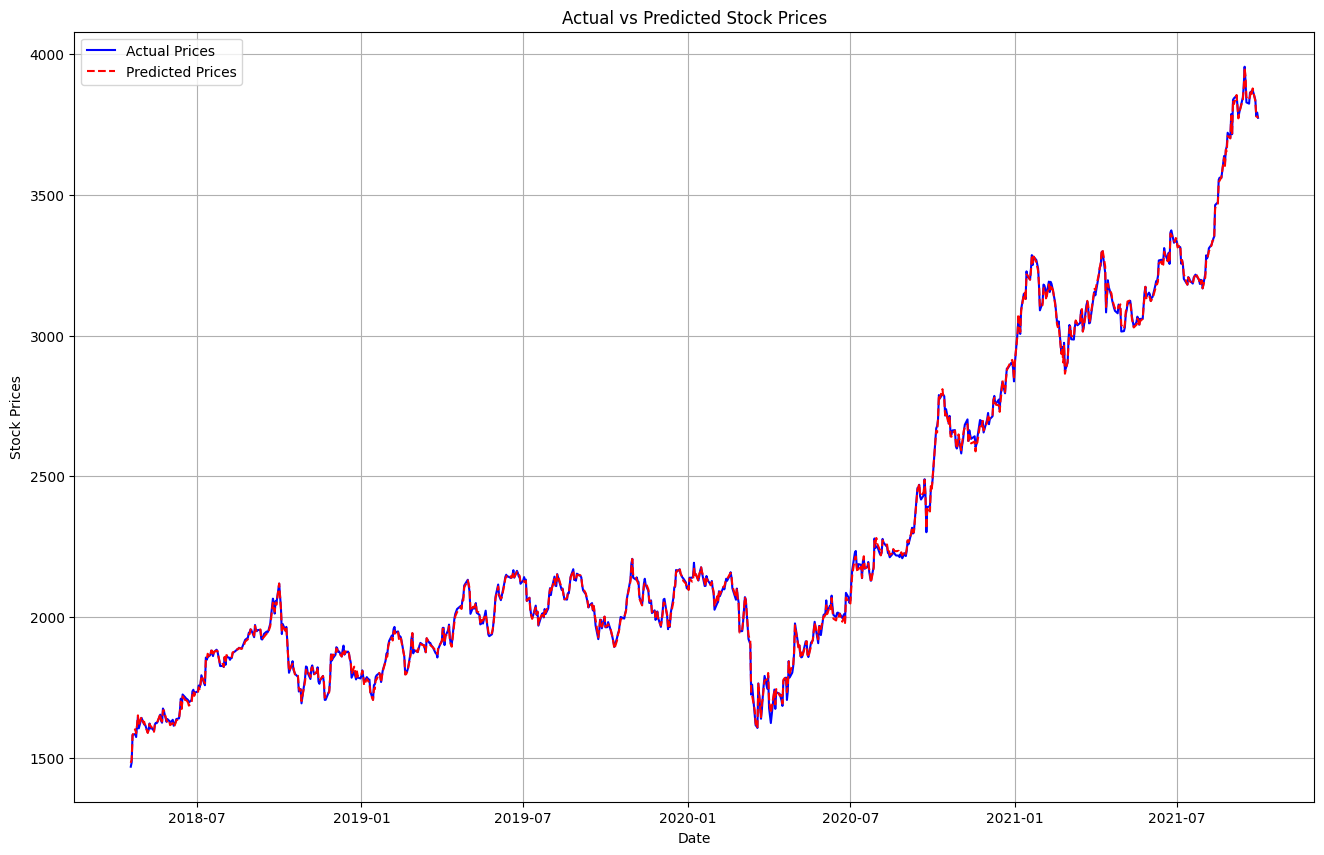

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(16, 10))
plt.plot(df_history["Date"].iloc[len(y_train):], y_test, label="Actual Prices", color="blue")
plt.plot(df_history["Date"].iloc[len(y_train):], y_pred, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Prices")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

XG Boost Model ( Gradient Boosting)

In [ ]:
# Prepare Features
df_history["Year"] = df_history["Date"].dt.year
df_history["Month"] = df_history["Date"].dt.month
df_history["Day"] = df_history["Date"].dt.day
df_history["Day_of_Week"] = df_history["Date"].dt.dayofweek
df_history["Close_Lag_1"] = df_history["Close"].shift(1)   # Lag feature

In [ ]:
df_history.dropna(inplace=True)

In [ ]:
# Define Featires (x) and (y)
x = df_history.drop(columns=["Date", "Close"])
y = df_history["Close"]

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=42)


In [ ]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=500, learning_rate=0.05, max_depth=6)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
y_pred = xgb_model.predict(x_test)

In [ ]:
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"XGBoost Performance: RMSE = {rmse:.2f}, R² = {r2:.2f}")

XGBoost Performance: RMSE = 1029.78, R² = -2.19


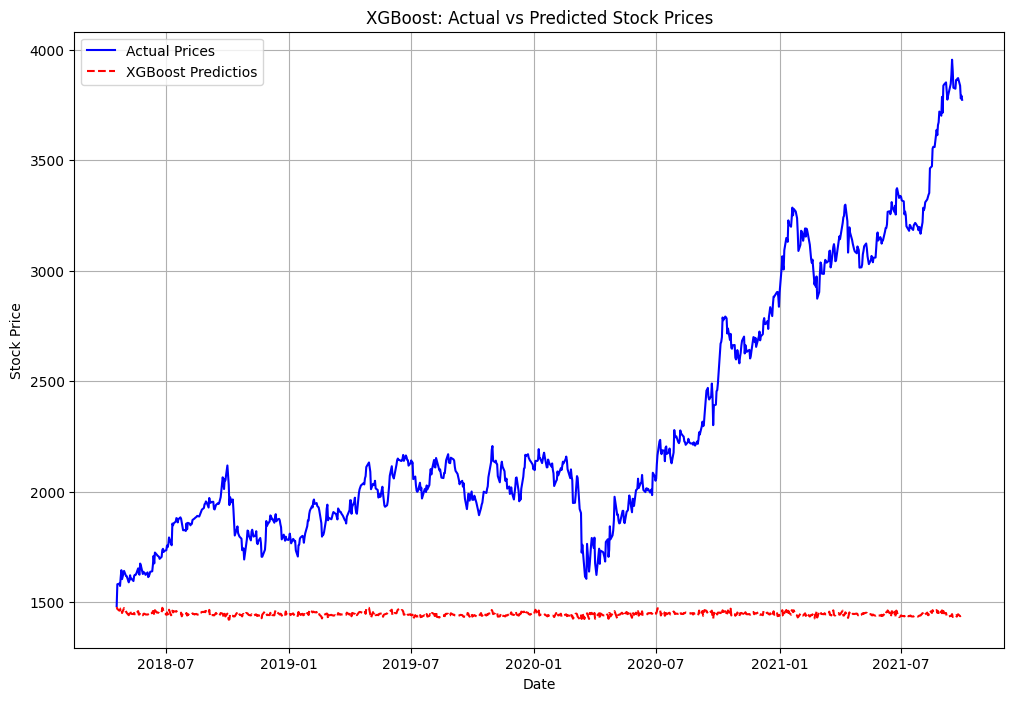

In [ ]:
# Plot prediction
plt.figure(figsize=(12, 8))
plt.plot(df_history["Date"].iloc[len(y_train):], y_test, label="Actual Prices", color="blue")
plt.plot(df_history["Date"].iloc[len(y_train):], y_pred, label="XGBoost Predictios", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("XGBoost: Actual vs Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

* Compare the model predictions with real stock prices. If the red line (Predictions) closely follows the blue line (actual prices), the model is performing well.
* Deviations indicate the areas for improvement.

<Figure size 1600x800 with 0 Axes>

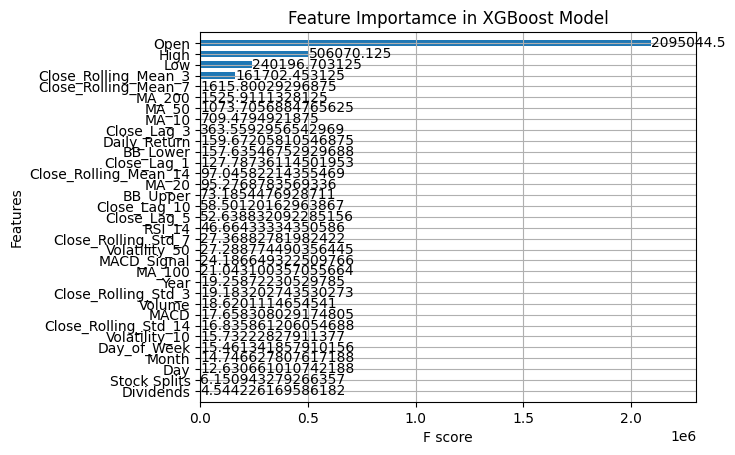

In [ ]:
# Plot feature importance
plt.figure(figsize=(16, 8))
plot_importance(xgb_model, importance_type="gain", height=0.6)
plt.title("Feature Importamce in XGBoost Model")
plt.show()

* Higher bars indicate features with more predictive power.
* Moving averages and trading volume are usually key indicators.

**XGBoost Hyperparameter Tuning** : Optimizes the model by:
* Improving accuracy by finding the best settings.
* Rreduce the overfitting to prevent poor generalization.
* Enhancing efficiency by optimizing computational perfromance.

In [ ]:
param_grid = {
    'learning_rate' : [0.01, 0.05, 0,1],
    'max_depth' : [3, 6, 10],
    'n_estimators' : [100, 300, 500]
}

grid_search = GridSearchCV(xgb.XGBRegressor(objective="reg:squarederror"), param_grid, cv=3, scoring="neg_mean_squared_error", verbose=1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}


Random Forest Model

In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(x_test)

In [ ]:
# Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f"Random Forest Performance: RMSE = {rmse_rf:.2f}, R² = {r2_rf:.2f}")

Random Forest Performance: RMSE = 1021.34, R² = -2.14


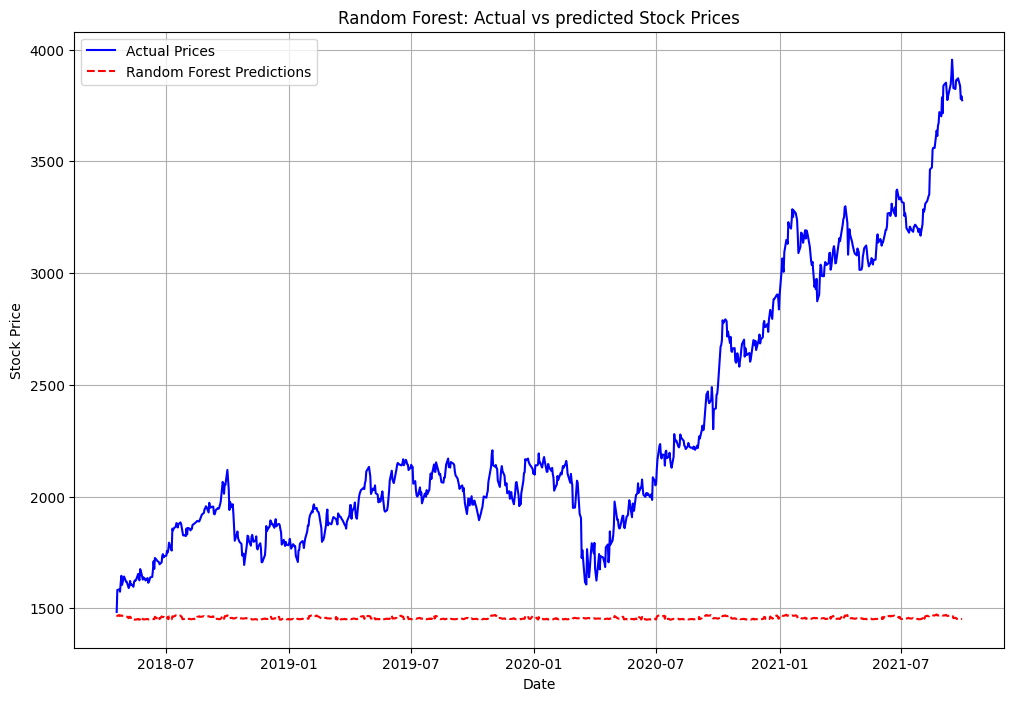

In [ ]:
# Plot Predictions
plt.figure(figsize=(12, 8))
plt.plot(df_history["Date"].iloc[len(y_train):], y_test, label="Actual Prices", color="blue")
plt.plot(df_history["Date"].iloc[len(y_train):], y_pred_rf, label="Random Forest Predictions", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Random Forest: Actual vs predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

* If the red line (Predictions) closely follows the blue line (actual prices), the model is performing well.
* Deviations indicate the areas for improvement, such as tuning hyper parameters.

**Conclusion**:

This project analyzed, visualized, and predicted stock prices using statistical and machine learning models.
* The stock exhibited an overall upward trend with periodic fluctuations and moving averages helped identify short-term and long-term trends. High trading volumes often preceded price changes, indicating market activity.
* Extracted year, month, day, day of the week to analyze seasonal trends and created lag features to incorporate past stock prices for predictions.Used technical indicators(Moving Averages) to enhance model accuracy.

Investors can use moving averages to identify buy/sell signals. Forecast the future stock prices and analyze market volatility. Predicting stock price trends help investors make informed decisions. Traders can leverage technical indicators for trend-based trading strategies. Financial Analysts can use predictive models to assess market risk and oppurtunities.
